In [1]:
import pandas as pd
df=pd.read_csv('../data/complaints.csv')
df.head()

C:\Users\aweso\AppData\Local\Temp\ipykernel_50748\3843148792.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('../data/complaints.csv')


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


In [2]:
df.info()
df.describe(include='all')
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
8185547,2017-02-24,Consumer Loan,Installment loan,Managing the loan or lease,NaN,NaN,Company has responded to the consumer and the ...,SYNCHRONY FINANCIAL,CO,80634,"Older American, Servicemember",Other,Web,2017-03-01,Closed with monetary relief,Yes,No,2360266
1128727,2025-03-14,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",VA,22656,NaN,Consent not provided,Web,2025-03-14,Closed with non-monetary relief,Yes,NaN,12482815
8560844,2025-05-16,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,TX,75115,NaN,NaN,Web,2025-05-16,In progress,Yes,NaN,13555345
7006764,2025-01-31,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information is missing that should be on the r...,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,10004,NaN,Consent not provided,Web,2025-01-31,Closed with non-monetary relief,Yes,NaN,11872861
6475742,2021-07-09,Mortgage,Conventional home mortgage,Closing on a mortgage,NaN,My wife and I have been working with New Ameri...,Company believes it acted appropriately as aut...,"BROKER SOLUTIONS, INC.",CA,94010,Older American,Consent provided,Web,2021-07-09,Closed with explanation,Yes,NaN,4529334


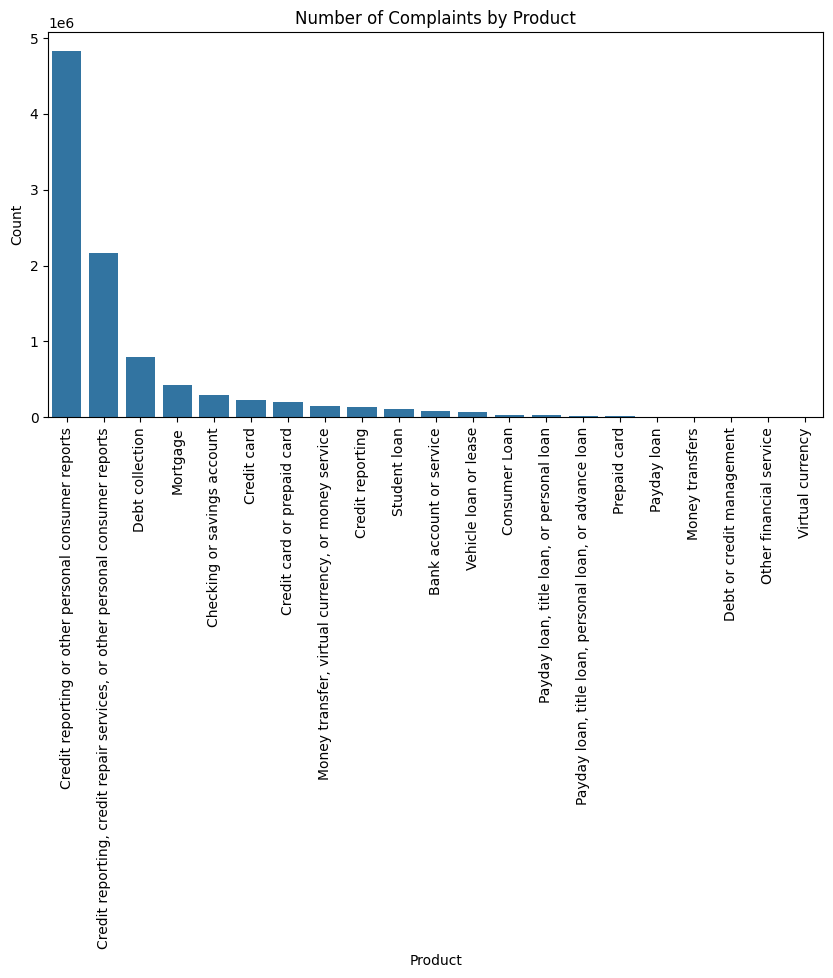

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
product_counts = df['Product'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=product_counts.index, y=product_counts.values)
plt.title('Number of Complaints by Product')
plt.ylabel('Count')
plt.xlabel('Product')
plt.xticks(rotation=90)
plt.show()

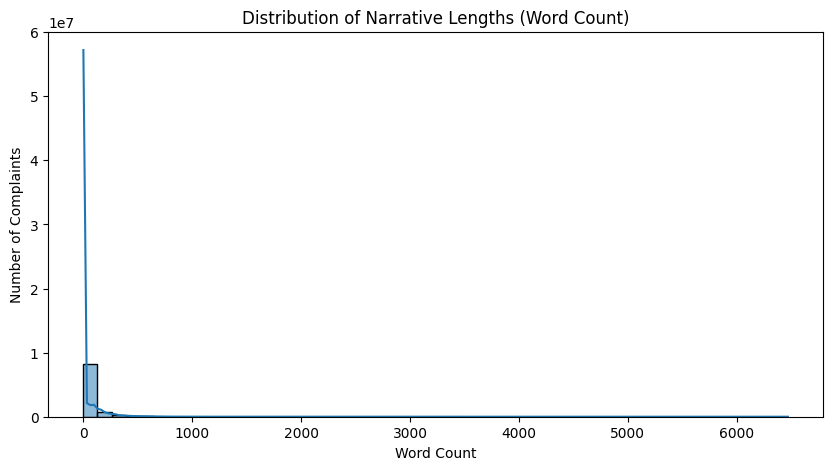

Shortest narrative: 1
Longest narrative: 6469


In [4]:
df['narrative_length'] = df['Consumer complaint narrative'].astype(str).apply(lambda x: len(x.split()))
plt.figure(figsize=(10,5))
sns.histplot(df['narrative_length'], bins=50, kde=True)
plt.title('Distribution of Narrative Lengths (Word Count)')
plt.xlabel('Word Count')
plt.ylabel('Number of Complaints')
plt.show()

print('Shortest narrative:', df["narrative_length"].min())
print('Longest narrative:', df["narrative_length"].max())

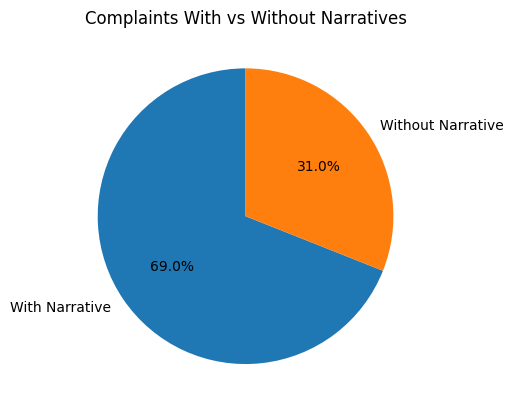

With narrative: 2980756
Without narrative: 6629041


In [5]:
has_narrative = df['Consumer complaint narrative'].notnull() & (df['Consumer complaint narrative'].str.strip() != '')
counts = has_narrative.value_counts()
plt.pie(counts, labels=['With Narrative', 'Without Narrative'], autopct='%1.1f%%', startangle=90)
plt.title('Complaints With vs Without Narratives')
plt.show()
print('With narrative:', counts[True])
print('Without narrative:', counts[False])

In [6]:
products = ['Credit card', 'Personal loan', 'Buy Now, Pay Later', 'Savings account', 'Money transfers']
filtered = df[df['Product'].isin(products)]
filtered = filtered[filtered['Consumer complaint narrative'].notnull() & (filtered['Consumer complaint narrative'].str.strip() != '')]
filtered.reset_index(drop=True, inplace=True)
filtered.shape

(82164, 19)

In [7]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    text = re.sub(r'i am writing to file a complaint', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

filtered['cleaned_narrative'] = filtered['Consumer complaint narrative'].astype(str).apply(clean_text)
filtered[['Product', 'cleaned_narrative']].head()

,Product,cleaned_narrative
0,Credit card,a xxxx xxxx card was opened under my name by a...
1,Credit card,dear cfpb i have a secured credit card with ci...
2,Credit card,i have a citi rewards cards the credit balance...
3,Credit card,bi am writing to dispute the following charges...
4,Credit card,although the account had been deemed closed i ...


In [8]:
filtered.to_csv('../data/filtered_complaints.csv', index=False)
print('Saved cleaned data to data/filtered_complaints.csv')

Saved cleaned data to data/filtered_complaints.csv
